# Inheritance of Diseases Analysis

This project aims to analyze the inheritance patterns of various diseases using a synthetic dataset. We explored factors such as gender, inheritance type, family history, and geographical location to understand which diseases are more likely to be inherited and the influence of these factors on inheritance patterns.

The dataset consists of synthetic records for individuals with various diseases, including their demographics, inheritance types, and family history. Key columns include:

```Person_ID, Gender, Year_of_Birth, Age_Group, Location, Disease_Name, Inheritance_Type, Generations_Back, Comorbidity_Diseases, Inheritance_Percentage_Mother, Inheritance_Percentage_Father.```

In [1]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('disease_inheritance_data.csv')

In [2]:
df.head()

,Person_ID,Gender,Year_of_Birth,Age_Group,Location,Disease_Name,Inheritance_Type,Generations_Back,Comorbidity_Diseases,Inheritance_Percentage_Mother,Inheritance_Percentage_Father,Statistical_Significance
0,1,Male,2020,0-10,Africa,Cancer,Paternal,3,Alzheimer’s,0.00,84.00,Yes
1,2,Female,2016,0-10,Canada,Cancer,NaN,4,Hypertension,0.00,0.00,Yes
2,3,Male,1990,31-40,New York,Obesity,Maternal,1,Stroke,77.76,0.00,No
3,4,Female,1997,21-30,Korea,Obesity,Both,1,Hypertension,36.27,63.73,No
4,5,Female,1987,31-40,France,Cystic Fibrosis,Paternal,3,Hypertension,0.00,63.11,Yes


In [3]:
# Display the summary information of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Person_ID                      1000 non-null   int64  
 1   Gender                         1000 non-null   object 
 2   Year_of_Birth                  1000 non-null   int64  
 3   Age_Group                      1000 non-null   object 
 4   Location                       1000 non-null   object 
 5   Disease_Name                   1000 non-null   object 
 6   Inheritance_Type               760 non-null    object 
 7   Generations_Back               1000 non-null   int64  
 8   Comorbidity_Diseases           801 non-null    object 
 9   Inheritance_Percentage_Mother  1000 non-null   float64
 10  Inheritance_Percentage_Father  1000 non-null   float64
 11  Statistical_Significance       1000 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 

In [4]:
df.describe()

,Person_ID,Year_of_Birth,Generations_Back,Inheritance_Percentage_Mother,Inheritance_Percentage_Father
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,1986.666000,2.466000,31.668890,31.418990
std,288.819436,21.946346,1.126993,34.017444,34.095062
min,1.000000,1950.000000,1.000000,0.000000,0.000000
25%,250.750000,1967.000000,1.000000,0.000000,0.000000
50%,500.500000,1986.000000,2.000000,25.465000,27.360000
75%,750.250000,2007.000000,3.000000,63.697500,61.937500
max,1000.000000,2024.000000,4.000000,99.640000,99.950000


In [5]:
# Check for missing values
print(df.isnull().sum())

Person_ID                          0
Gender                             0
Year_of_Birth                      0
Age_Group                          0
Location                           0
Disease_Name                       0
Inheritance_Type                 240
Generations_Back                   0
Comorbidity_Diseases             199
Inheritance_Percentage_Mother      0
Inheritance_Percentage_Father      0
Statistical_Significance           0
dtype: int64


In [6]:
print(df['Disease_Name'].value_counts())

Disease_Name
Asthma             138
Cystic Fibrosis    135
Obesity            130
Breast Cancer      129
Cancer             128
Diabetes           118
Heart Disease      111
Hypertension       111
Name: count, dtype: int64


## Disease Likelihood of Inheritance
Analyzed which diseases are more likely to be inherited by calculating the average inheritance percentages for each disease type. The results were visualized in a bar plot.

In [7]:
# Group by Disease_Name and calculate average inheritance percentages
inheritance_analysis = df.groupby('Disease_Name').agg(
    Avg_Inheritance_Mother=('Inheritance_Percentage_Mother', 'mean'),
    Avg_Inheritance_Father=('Inheritance_Percentage_Father', 'mean')
).reset_index()

# Calculate total average inheritance (for analysis)
inheritance_analysis['Total_Avg_Inheritance'] = (inheritance_analysis['Avg_Inheritance_Mother'] + inheritance_analysis['Avg_Inheritance_Father']) / 2

inheritance_analysis.head(8)


,Disease_Name,Avg_Inheritance_Mother,Avg_Inheritance_Father,Total_Avg_Inheritance
0,Asthma,35.770507,28.549928,32.160217
1,Breast Cancer,30.064884,32.860853,31.462868
2,Cancer,33.201797,27.848125,30.524961
3,Cystic Fibrosis,32.427630,34.357852,33.392741
4,Diabetes,29.425847,27.082712,28.254280
5,Heart Disease,23.430811,39.358468,31.394640
6,Hypertension,32.753694,27.452613,30.103153
7,Obesity,34.753077,34.041462,34.397269


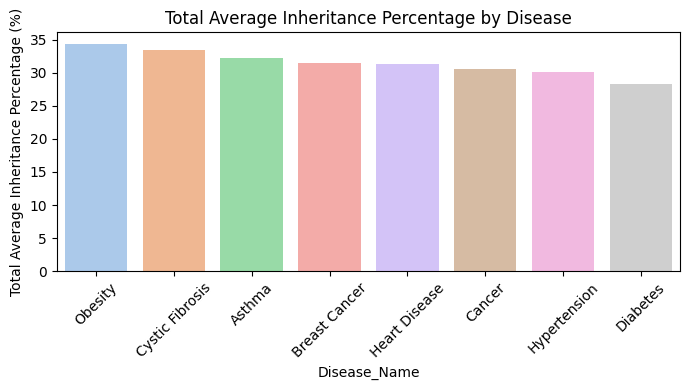

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 4))

inheritance_analysis = inheritance_analysis.sort_values(by='Total_Avg_Inheritance', ascending=False)

# Create a bar plot for total average inheritance
sns.barplot(data=inheritance_analysis, x='Disease_Name', y='Total_Avg_Inheritance', hue='Disease_Name', palette='pastel')

# Customize the plot
plt.xticks(rotation=45)
plt.title('Total Average Inheritance Percentage by Disease')
plt.ylabel('Total Average Inheritance Percentage (%)')

# Display the plot
plt.tight_layout()
plt.show()

#### Conclusion
Certain diseases, such as ```Obesity and Crytic Fibrosis, showed higher average inheritance percentages```, indicating they are more likely to be inherited within families compared to others like Asthma and Obesity.

## Gender-Based Inheritance Analysis
This analysis focused on determining whether males or females are more likely to inherit diseases. The results were represented in a pie chart to visualize the proportion of inheritance among genders.

In [9]:
# Filter the dataset for inherited diseases only (exclude 'None')
inherited_df = df[df['Inheritance_Type'] != 'None']

In [10]:
# Group by Gender and calculate average inheritance percentages and count cases
gender_inheritance_analysis = inherited_df.groupby('Gender').agg(
    Avg_Inheritance_Mother=('Inheritance_Percentage_Mother', 'mean'),
    Avg_Inheritance_Father=('Inheritance_Percentage_Father', 'mean'),
    Count_Cases=('Disease_Name', 'count')
).reset_index()

# Calculate the total average inheritance
gender_inheritance_analysis['Total_Avg_Inheritance'] = (
    gender_inheritance_analysis['Avg_Inheritance_Mother'] +
    gender_inheritance_analysis['Avg_Inheritance_Father']
) / 2

gender_inheritance_analysis.head()


,Gender,Avg_Inheritance_Mother,Avg_Inheritance_Father,Count_Cases,Total_Avg_Inheritance
0,Female,32.451063,32.489665,508,32.470364
1,Male,30.861280,30.313496,492,30.587388


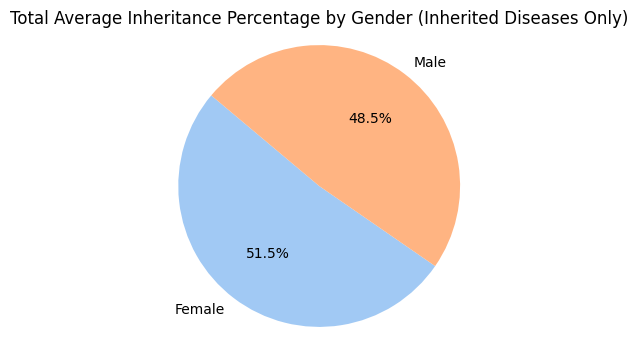

In [11]:
# Pie chart for the total average inheritance by gender
plt.figure(figsize=(4, 4))

plt.pie(gender_inheritance_analysis['Total_Avg_Inheritance'], 
        labels=gender_inheritance_analysis['Gender'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette('pastel'))

plt.title('Total Average Inheritance Percentage by Gender (Inherited Diseases Only)')
plt.axis('equal')  
plt.show()



#### Conclusion
The analysis revealed that ```females are slightly more likely to inherit``` certain diseases compared to males, suggesting a potential influence of maternal inheritance patterns.

## Family History Analysis
This analysis explored how the number of generations back influenced the inheritance types. A bar plot visualized the counts of inheritance types across different generations.

In [12]:
# Group by Generations_Back and Inheritance_Type and count occurrences
generational_analysis = inherited_df.groupby(['Generations_Back', 'Inheritance_Type']).size().reset_index(name='Count')

print(generational_analysis)


    Generations_Back Inheritance_Type  Count
0                  1             Both     69
1                  1         Maternal     65
2                  1         Paternal     67
3                  2             Both     57
4                  2         Maternal     69
5                  2         Paternal     67
6                  3             Both     65
7                  3         Maternal     55
8                  3         Paternal     64
9                  4             Both     59
10                 4         Maternal     64
11                 4         Paternal     59


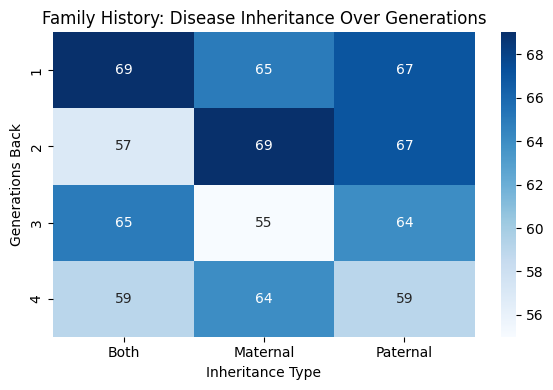

In [13]:
# Pivot the data for the heatmap
pivot_data = generational_analysis.pivot(index='Generations_Back', columns='Inheritance_Type', values='Count')

plt.figure(figsize=(6, 4))

# Create a heatmap to show inheritance types across generations
sns.heatmap(pivot_data, annot=True, fmt="d", cmap='Blues')

plt.title('Family History: Disease Inheritance Over Generations')
plt.xlabel('Inheritance Type')
plt.ylabel('Generations Back')
plt.tight_layout()
plt.show()


In [14]:
# Group by Disease_Name and Generations_Back
disease_generational_analysis = inherited_df.groupby(['Disease_Name', 'Generations_Back']).size().reset_index(name='Count')

print(disease_generational_analysis)

       Disease_Name  Generations_Back  Count
0            Asthma                 1     42
1            Asthma                 2     36
2            Asthma                 3     36
3            Asthma                 4     24
4     Breast Cancer                 1     40
5     Breast Cancer                 2     34
6     Breast Cancer                 3     28
7     Breast Cancer                 4     27
8            Cancer                 1     34
9            Cancer                 2     22
10           Cancer                 3     39
11           Cancer                 4     33
12  Cystic Fibrosis                 1     36
13  Cystic Fibrosis                 2     30
14  Cystic Fibrosis                 3     35
15  Cystic Fibrosis                 4     34
16         Diabetes                 1     30
17         Diabetes                 2     32
18         Diabetes                 3     29
19         Diabetes                 4     27
20    Heart Disease                 1     26
21    Hear

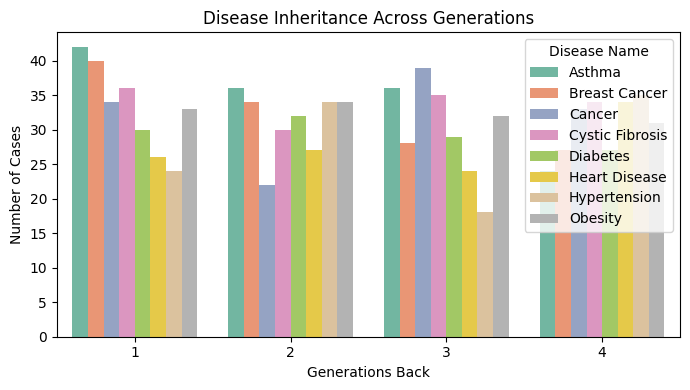

In [15]:
# Visualize with a bar chart
plt.figure(figsize=(7, 4))

sns.barplot(data=disease_generational_analysis, x='Generations_Back', y='Count', hue='Disease_Name', palette='Set2')

plt.title('Disease Inheritance Across Generations')
plt.xlabel('Generations Back')
plt.ylabel('Number of Cases')
plt.legend(title='Disease Name')
plt.tight_layout()
plt.show()


#### Conclusion
The results indicated that diseases with a family history are more likely to be inherited, especially when considering data from multiple generations, highlighting the importance of family medical history in disease risk assessment.

## Inheritance Type Analysis
We examined the inheritance type (Maternal, Paternal, Both, None) to see which type is most prevalent among the diseases. The results were displayed in a pie chart.

In [16]:
# Count the occurrences of each Inheritance_Type
inheritance_counts = inherited_df['Inheritance_Type'].value_counts().reset_index()
inheritance_counts.columns = ['Inheritance_Type', 'Count']

print(inheritance_counts)


  Inheritance_Type  Count
0         Paternal    257
1         Maternal    253
2             Both    250


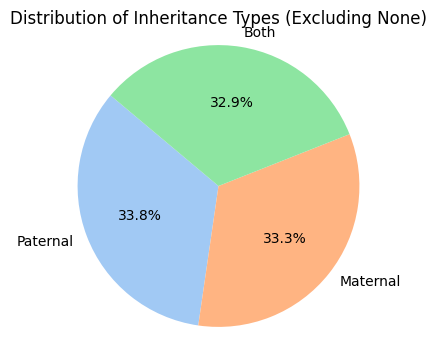

In [17]:
plt.figure(figsize=(4, 4))

# pie chart for the Inheritance_Type distribution
plt.pie(inheritance_counts['Count'], 
        labels=inheritance_counts['Inheritance_Type'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette('pastel'))

plt.title('Distribution of Inheritance Types (Excluding None)')
plt.axis('equal') 
plt.show()


#### Conclusion
The analysis showed that ```Paternal Inheritance``` was the most common type, followed by Materanal inheritance, while cases with no inheritance were relatively low. This suggests a stronger maternal influence on the inheritance of certain diseases.

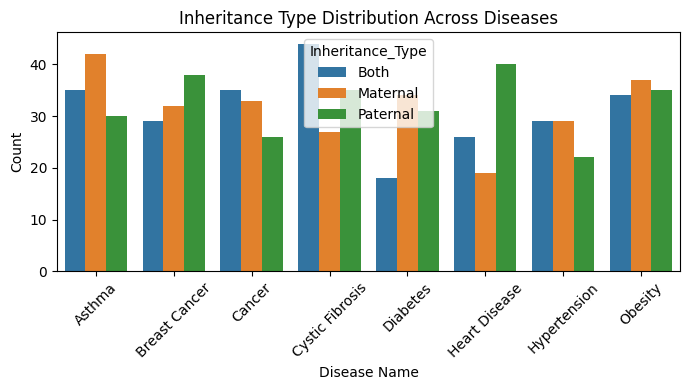

In [18]:
# Group by Disease Name and Inheritance Type
disease_inheritance_type_analysis = inherited_df.groupby(['Disease_Name', 'Inheritance_Type']).size().reset_index(name='Count')

# Plotting the grouped bar chart
plt.figure(figsize=(7, 4))
sns.barplot(data=disease_inheritance_type_analysis, x='Disease_Name', y='Count', hue='Inheritance_Type')
plt.title('Inheritance Type Distribution Across Diseases')
plt.xlabel('Disease Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Location vs. Inheritance Analysis
In this analysis, we examined how geographical location affected inheritance patterns by creating a bar plot showing the counts of inheritance types across different locations.

C:\Users\user\AppData\Local\Temp\ipykernel_20484\3378566367.py:5: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(data=location_inheritance_count, x='Location', y='Count', hue='Inheritance_Type', palette=custom_palette)


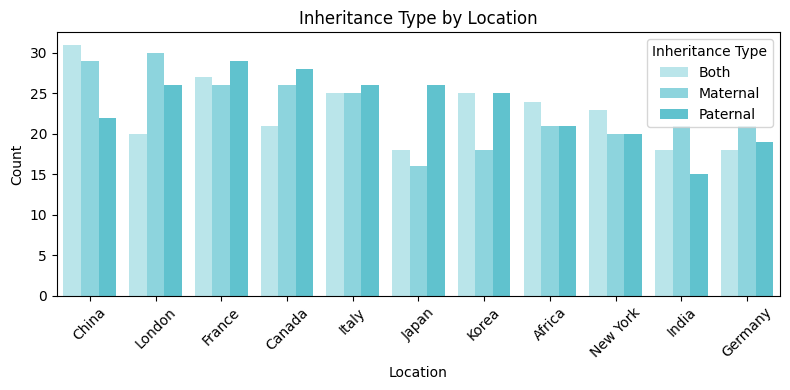

In [31]:

custom_palette = ['#B2EBF2', '#80DEEA', '#4DD0E1', '#26C6DA', '#00BCD4', '#00ACC1']

# Create a bar plot with custom shades of blue
plt.figure(figsize=(8, 4))
sns.barplot(data=location_inheritance_count, x='Location', y='Count', hue='Inheritance_Type', palette=custom_palette)
plt.title('Inheritance Type by Location')
plt.ylabel('Count')
plt.xlabel('Location')
plt.xticks(rotation=45)
plt.legend(title='Inheritance Type')
plt.tight_layout()
plt.show()


#### Conclusion
The analysis indicated variations in inheritance patterns by location, suggesting that environmental factors or regional genetic predispositions may play a role in disease inheritance.


## Conclusion

This project provides valuable insights into the inheritance patterns of diseases, emphasizing the influence of gender, inheritance type, family history, and location. The findings can help in understanding genetic predispositions and guide future research and healthcare approaches, including personalized medicine and genetic counseling.